In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trdata=pd.read_csv('train.csv')


In [3]:
#to keep main data as it is for reference
trdata1=trdata.copy()

# ##Data Analysis for House Price Prediction

In [4]:
trdata.shape

(1460, 81)

In [5]:
miss_values=(trdata.isnull().sum()/len(trdata) )*100
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [6]:
#drop the column having more than 60% missing values
trdata.drop(['Alley'],axis=1, inplace=True)
trdata.drop(['Fence'],axis=1, inplace=True)
trdata.drop(['MiscFeature'],axis=1, inplace=True)
trdata.drop(['PoolQC'],axis=1, inplace=True)


In [7]:
miss_values=(trdata.isnull().sum()/len(trdata) )*100
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


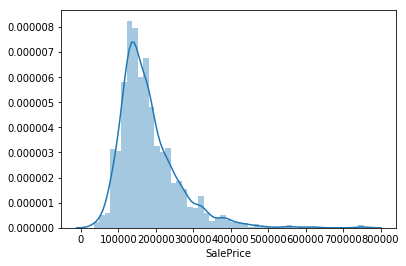

In [8]:
#to display distortion graph of salesprice
sns.distplot(trdata['SalePrice'])

C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


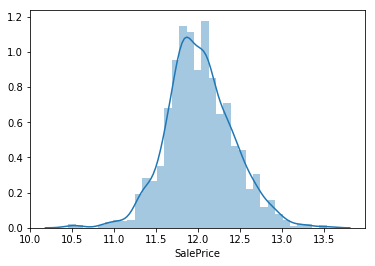

In [9]:
#to display equal distribution of salesprice using log
targt=np.log(trdata['SalePrice'])
sns.distplot(targt)


In [10]:
#find numerical value from training data
num_data=trdata.select_dtypes(include=[np.number])
print("Numeric data")
num_data.shape


Numeric data


(1460, 38)

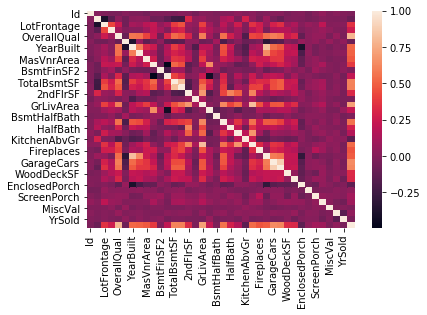

In [11]:
#plot corelation graph for numerical data
corr=num_data.corr()
sns.heatmap(corr)

In [12]:
trdata.OverallQual.value_counts().sort_values()

1       2
2       3
10     18
3      20
9      43
4     116
8     168
7     319
6     374
5     397
Name: OverallQual, dtype: int64

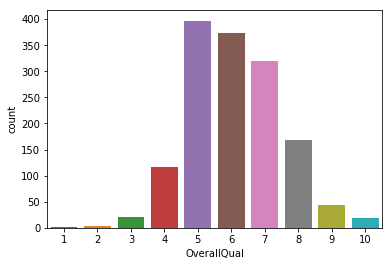

In [13]:
sns.countplot(x='OverallQual',data=trdata)

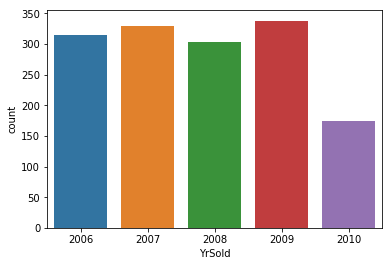

In [14]:
sns.countplot(x='YrSold', data=trdata)

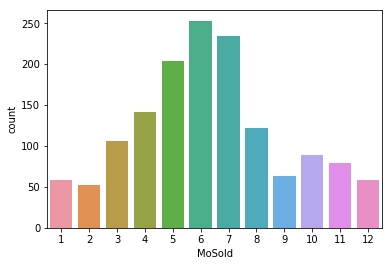

In [15]:
sns.countplot(x='MoSold', data=trdata)

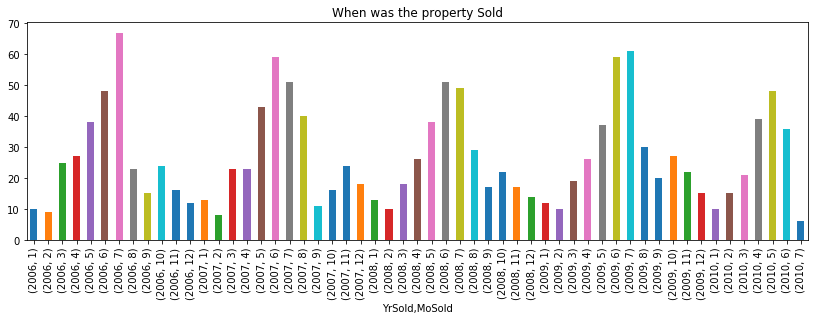

In [16]:
trdata.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,4))
plt.title("When was the property Sold")
plt.show()

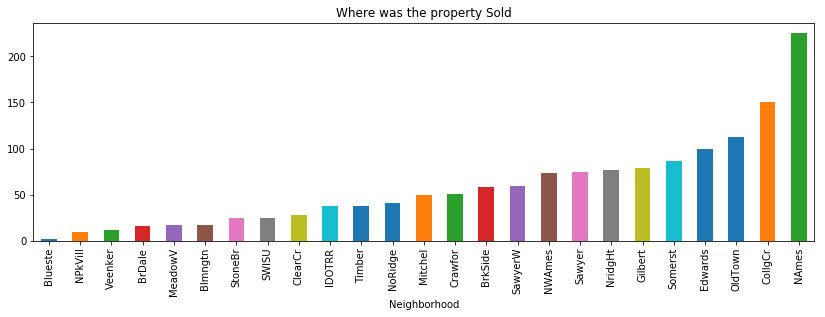

In [17]:
trdata.groupby(['Neighborhood']).Id.count().sort_values().plot(kind='bar',figsize=(14,4))
plt.title("Where was the property Sold")
plt.show()

In [18]:
trdata.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [19]:
print(trdata.YrSold.value_counts())
#print(trdata.YearBuilt.value_counts().sort_values())
#trdata.Condition1.value_counts()
trdata[['YearBuilt','YrSold','BedroomAbvGr','SalePrice','OverallCond','LotArea','Condition1']]

#sns.countplot(x='YearBuilt', data=trdata)

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


,YearBuilt,YrSold,BedroomAbvGr,SalePrice,OverallCond,LotArea,Condition1
0,2003,2008,3,208500,5,8450,Norm
1,1976,2007,3,181500,8,9600,Feedr
2,2001,2008,3,223500,5,11250,Norm
3,1915,2006,3,140000,5,9550,Norm
4,2000,2008,4,250000,5,14260,Norm
5,1993,2009,1,143000,5,14115,Norm
6,2004,2007,3,307000,5,10084,Norm
7,1973,2009,3,200000,6,10382,PosN
8,1931,2008,2,129900,5,6120,Artery
9,1939,2008,2,118000,6,7420,Artery


C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\

C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


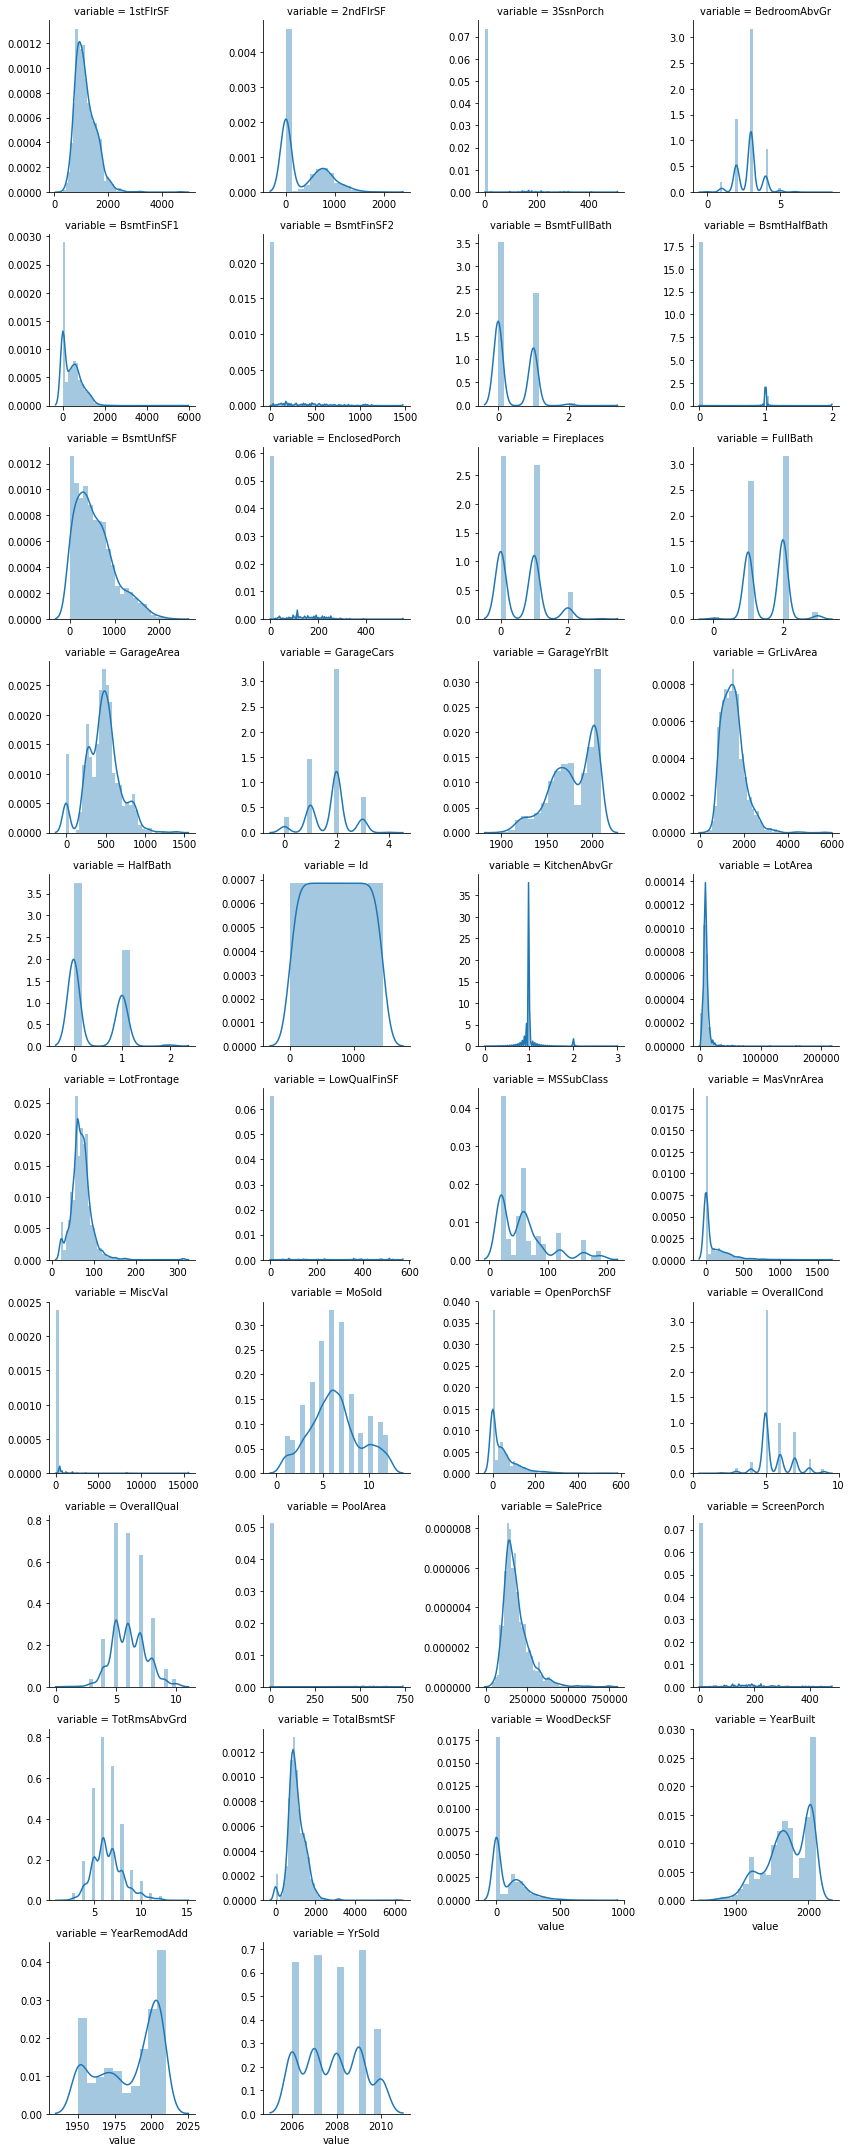

In [20]:
f=pd.melt(trdata, value_vars=sorted(num_data))
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g=g.map(sns.distplot, 'value')

In [21]:
#find categorical values from training data
cat_data=trdata.select_dtypes(exclude=[np.number])
print("Categorical data")
print(cat_data.shape)
print("Numerical data")
print(num_data.shape)


Categorical data
(1460, 39)
Numerical data
(1460, 38)


In [22]:
# conversion of numerical data (which work as categorical) to categorical data
trdata['YrSold']=trdata.YrSold.apply(lambda x:str(x))
trdata['MoSold']=trdata.MoSold.apply(lambda x:str(x))
trdata['MSSubClass']=trdata.MSSubClass.apply(lambda x:str(x))


In [23]:
cat_data=trdata.select_dtypes(exclude=[np.number])
num_data=trdata.select_dtypes(include=[np.number])
print("Categorical data")
print(cat_data.shape)
print("Numerical data")
print(num_data.shape)


Categorical data
(1460, 42)
Numerical data
(1460, 35)


C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


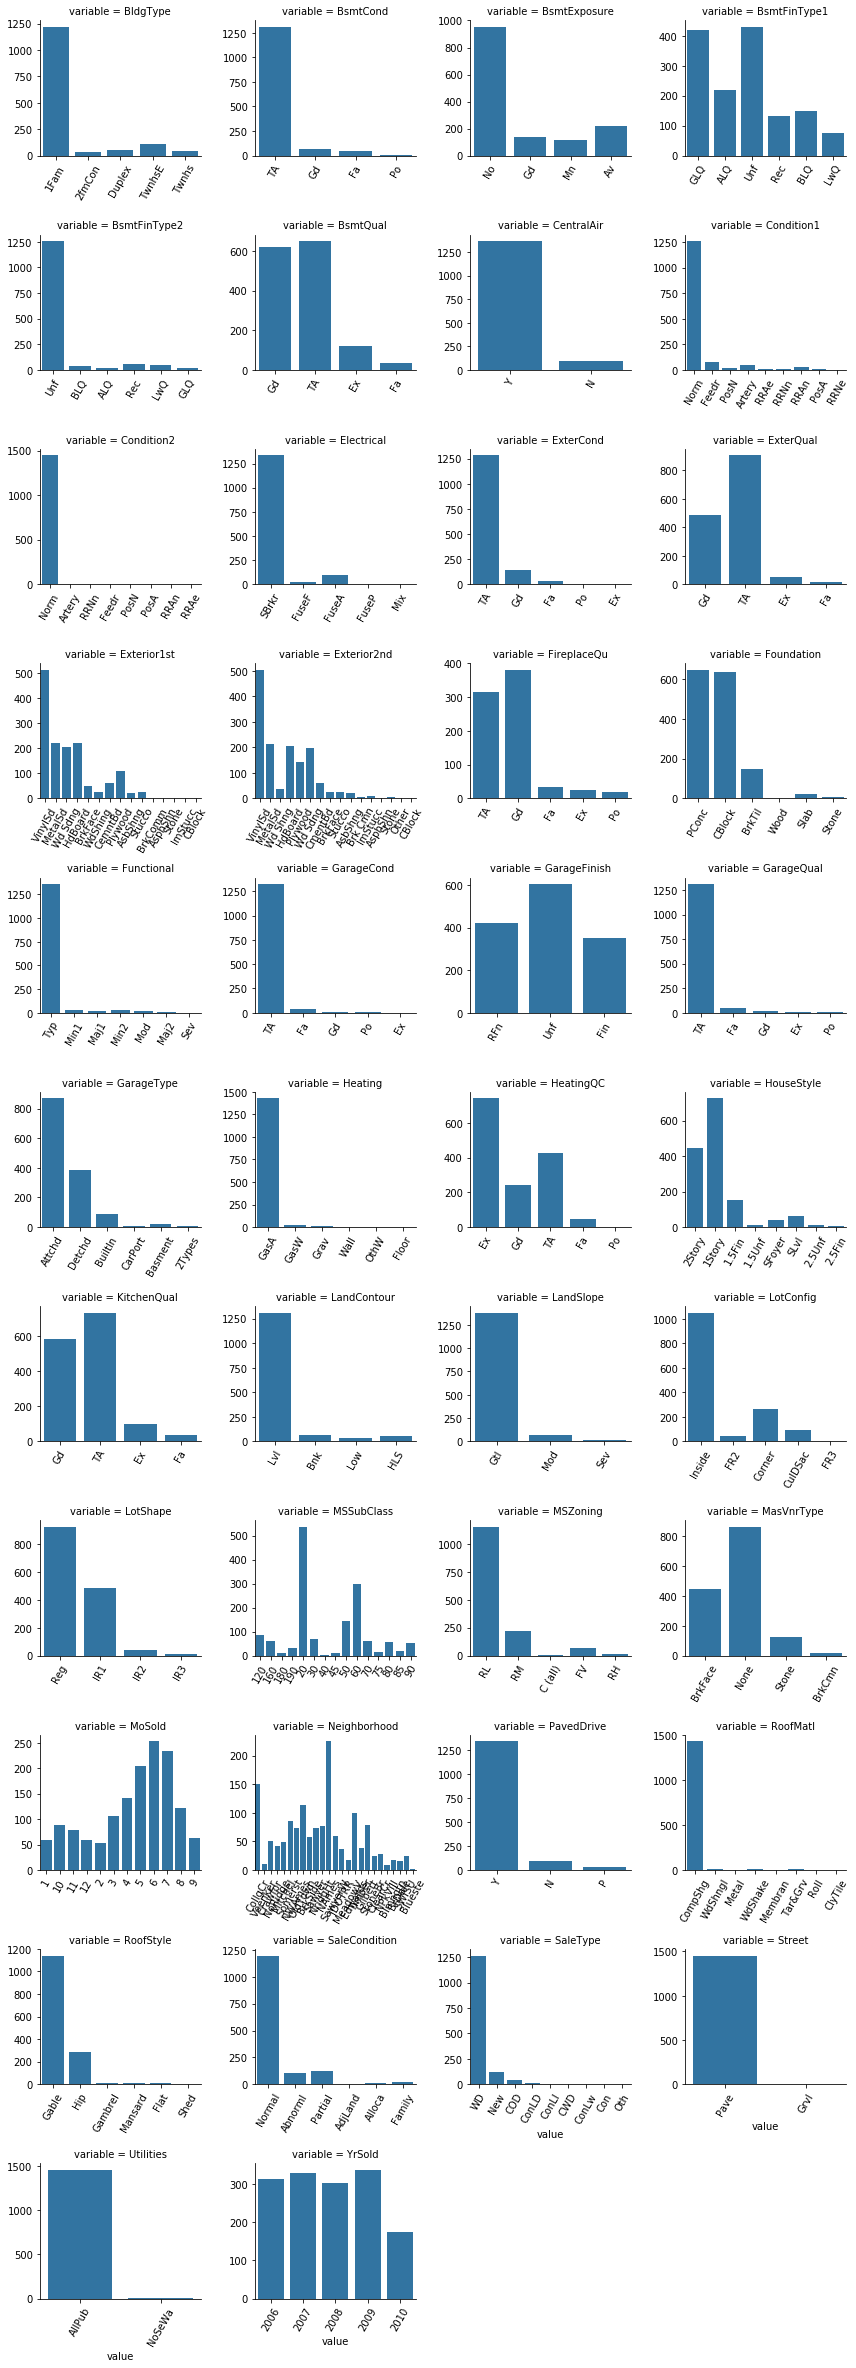

In [24]:
#Graphical representation of categorical features/variables
f=pd.melt(trdata, value_vars= sorted(cat_data))
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [25]:
trdata.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [26]:
# to convert categorical to numerical-- Street
trdata.Street.replace({'Pave':1,'Grvl':2}, inplace=True)

In [27]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [28]:
ms=trdata.isnull().sum()
ms=ms[ms>0]
ms

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [29]:
trdata['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [30]:
trdata['LotFrontage']=trdata['LotFrontage'].fillna(trdata['LotFrontage'].mean())
trdata['MasVnrType']=trdata['MasVnrType'].fillna(trdata['MasVnrType'].mode()[0])
trdata['MasVnrArea']=trdata['MasVnrArea'].fillna(trdata['MasVnrArea'].mean())
trdata['BsmtQual']=trdata['BsmtQual'].fillna(trdata['BsmtQual'].mode()[0])
trdata['BsmtCond']=trdata['BsmtCond'].fillna(trdata['BsmtCond'].mode()[0])
trdata['BsmtExposure']=trdata['BsmtExposure'].fillna(trdata['BsmtExposure'].mode()[0])
trdata['BsmtFinType1']=trdata['BsmtFinType1'].fillna(trdata['BsmtFinType1'].mode()[0])
trdata['BsmtFinType2']=trdata['BsmtFinType2'].fillna(trdata['BsmtFinType2'].mode()[0])
trdata['Electrical']=trdata['Electrical'].fillna(trdata['Electrical'].mode()[0])
trdata.drop(['FireplaceQu'], axis=1, inplace=True)
trdata['GarageType']=trdata['GarageType'].fillna(trdata['GarageType'].mode()[0])
trdata['GarageFinish']=trdata['GarageFinish'].fillna(trdata['GarageFinish'].mode()[0])
trdata['GarageQual']=trdata['GarageQual'].fillna(trdata['GarageQual'].mode()[0])
trdata['GarageCond']=trdata['GarageCond'].fillna(trdata['GarageCond'].mode()[0])

In [31]:
trdata.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [32]:
cat_data.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
# to convert categorical to numerical-- Street
#trdata.GarageQual.replace({'TA':1,'Fa':2,'Gd'=3,'Po'=4,'Ex'=5}, inplace=True)
trdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
trdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
# to display rows with respect to condition
trdata[trdata['GarageYrBlt']==0]['YearBuilt']

Series([], Name: YearBuilt, dtype: int64)

In [36]:
# to fill nan values with 0(zero)
trdata.GarageYrBlt=trdata.GarageYrBlt.fillna(0)
# to convert column from float to int
trdata['GarageYrBlt']=trdata.GarageYrBlt.apply(lambda x: int(x))

In [37]:
# code to write Yearbuilt value in GarageYrBlt  where it is 0
for ind, row in trdata.iterrows():
    if row['GarageYrBlt']==0:
        trdata.loc[ind,'GarageYrBlt']=row['YearBuilt']

In [38]:
trdata[['GarageYrBlt','YearBuilt']]


,GarageYrBlt,YearBuilt
0,2003,2003
1,1976,1976
2,2001,2001
3,1998,1915
4,2000,2000
5,1993,1993
6,2004,2004
7,1973,1973
8,1931,1931
9,1939,1939
